# Primer parcial de Laboratorio de Datos

16 de octubre de 2024

----


**ANTES DE EMPEZAR**

El parcial consiste en 3 problemas independientes, cada uno con varios items.

1. Hacer una copia de este Colab en tu drive.
2. Leer todo el parcial antes de comenzar.
3. Comenzar a resolver lo que consideren mas simple ...
4. ... pero mantener en la entrega el orden de los problemas y los items.
5. Indicar en cada punto cual es la propuesta para resolverlo, luego la implementación y a continuación cualquier comentario relevante acerca del resultado.

> *Ejemplo:*
>
> Para generar la columna `C`,
> necesito para cada fila información de las columnas `A` y `B`,
> por lo que tengo que usar `df.apply(func, axis="columns")`
> que aplica a cada fila la función `func`.
> Para cada fila, si `A` es par y `B` es impar, la `func` devuelve...

6. El notebook debe correr de forma autónoma, bajando automáticamente los archivos, sin necesidad de operación del usuario ni usando programas externos (excel, word, notepad, etc). Sin embargo, podés usar lo que necesites para indagar el formato de un archivo o cualquier cosa que necesites.
7. Podes utilizar **cualquier** recurso disponible, **excepto** la comunicación con tus compañeros/as.
8. El examen termina a las 18 hrs.

**ANTES DE ENTREGAR**:

1.   Releer.
2.   Verificar que TODO el codigo corra.

**PARA ENTREGAR**:

1. Se realiza a través del campus en el mismo lugar donde encontraste el link para este colab.
2. Bajar en colab el archivo `.ipynb` (`File` > `Download` > `Download .ipynb`) y subirlo al campus.
3. Compartir el colab (`Share`, opción `Anyone with link` y `Commenter`, `Copy link`) copiando el link el campus.



## Problema 1: nombres en la ciudad

El gobierno de la Ciudad de Buenos Aires publica el Listado de nombres inscriptos en el Registro Civil (nombres usados) y listado de nombres aprobados por el Registro Civil hasta la derogación de la ley 18248 por parte del Código Civil y Comercial vigente desde 2015 (nombres permitidos).

https://data.buenosaires.gob.ar/dataset/nombres

En los puntos 2, 3, 4, 5 y 7 pone una breve explicación de la estrategia para obtener el resultado deseado antes del código.

In [ ]:
import random
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import seaborn as sns
import seaborn.objects as so

### 1. Bajá los datos de **nombres permitidos** e importalos a un pandas dataframe.

In [ ]:
permitidos = pd.read_csv("nombres-permitidos.csv", sep=";")
df = pd.DataFrame(permitidos)
df

,NOMBRE,SEXO,ORIGEN,SIGNIFICADO
0,AARON,M,S/O,S/S
1,AARONIT,M,S/O,S/S
2,ABA,F,S/O,S/S
3,ABACO,M,S/O,S/S
4,ABALEN,M,S/O,S/S
...,...,...,...,...
9812,ZUNILDA,F,S/O,S/S
9813,ZURIEL,A,S/O,S/S
9814,ZUZA,F,S/O,S/S
9815,ZUZANNY,F,S/O,S/S


### 2. Encontrá la cantidad de nombres por sexo.

In [ ]:
cantidad_por_sexo = df.groupby('SEXO')['NOMBRE'].count()
cantidad_por_sexo

,NOMBRE
SEXO,
A,483
F,4354
M,4980


### 3. Agrega una columna "largo" que contenga el largo de cada nombre.

(Con largo, nos referimos a la cantidad de caracteres. Pueden incluir espacios como parte del largo para nombres compuestos.)


In [ ]:
df['Largo'] = df['NOMBRE'].str.len()
df

,NOMBRE,SEXO,ORIGEN,SIGNIFICADO,Largo
0,AARON,M,S/O,S/S,5
1,AARONIT,M,S/O,S/S,7
2,ABA,F,S/O,S/S,3
3,ABACO,M,S/O,S/S,5
4,ABALEN,M,S/O,S/S,6
...,...,...,...,...,...
9812,ZUNILDA,F,S/O,S/S,7
9813,ZURIEL,A,S/O,S/S,6
9814,ZUZA,F,S/O,S/S,4
9815,ZUZANNY,F,S/O,S/S,7


### 4. Encontrá los nombres (sin distinguir entre simples o compuestos) más cortos y más largos para cada sexo.


In [ ]:
# nombres mas cortos por sexo
min_largos = df.groupby('SEXO')['Largo'].min()
nombres_mas_cortos = df[df.apply(lambda row: row['Largo'] == min_largos[row['SEXO']], axis=1)]
print("Los nombres más cortos por sexo son:\n", nombres_mas_cortos[['NOMBRE', 'SEXO']])


Los nombres más cortos por sexo son:
      NOMBRE SEXO
322      AL    M
674      AN    F
1661     BO    A
3508     FE    F
4365     HO    M
4438     IA    F
4497     IK    A
5564     LI    A
7097     OG    M
7247     OZ    A
9152     TY    M
9575     YA    F
9675     YU    M


In [ ]:
# nombres mas largos por sexo
max_largos = df.groupby('SEXO')['Largo'].max()
nombres_mas_largos = df[df.apply(lambda row: row['Largo'] == max_largos[row['SEXO']], axis=1)]
print("Los nombres más largos por sexo son:\n", nombres_mas_largos[['NOMBRE', 'SEXO']])

Los nombres más largos por sexo son:
                     NOMBRE SEXO
1890  CAMILA DE LA CARIDAD    F
2631  DEL CORAZON DE JESUS    A
3680  FRANCISCO COLMENARIO    M
6078  MARIA D.L.CONCEPCION    F
6080  MARIA D.T.LOS SANTOS    F
6087  MARIA DE LA ALMUDENA    F
6092  MARIA DE LA MACARENA    F
6098  MARIA DE LAS ERMITAS    F
6099  MARIA DE LAS GRACIAS    F
6108  MARIA DEL MONTSERRAT    F
6114  MARIA DELOS MILAGROS    F
8522  SILVINA DL GUADALUPE    F


### 5. ¿Cuál es el largo más común? Poné algunos ejemplos.


In [ ]:
# Calcula la frecuencia de cada largo de nombre
frecuencia_largos = df['Largo'].value_counts() # va desde el mas largo al menos

# Encuentra el largo más común
largo_mas_comun = frecuencia_largos.index[0] # el primero es el mas largo

# Imprime el largo más común y algunos ejemplos
print(f"El largo más común es: {largo_mas_comun}")
print("\nAlgunos ejemplos de nombres con ese largo son:")
print(df[df['Largo'] == largo_mas_comun]['NOMBRE'].head(5)) # Muestra los primeros 5 ejemplos


El largo más común es: 6

Algunos ejemplos de nombres con ese largo son:
4     ABALEN
7     ABBOTT
9     ABDALA
14    ABDIAS
15    ABDIEL
Name: NOMBRE, dtype: object


### 6. Hacé un histograma de largo, coloreado por sexo.


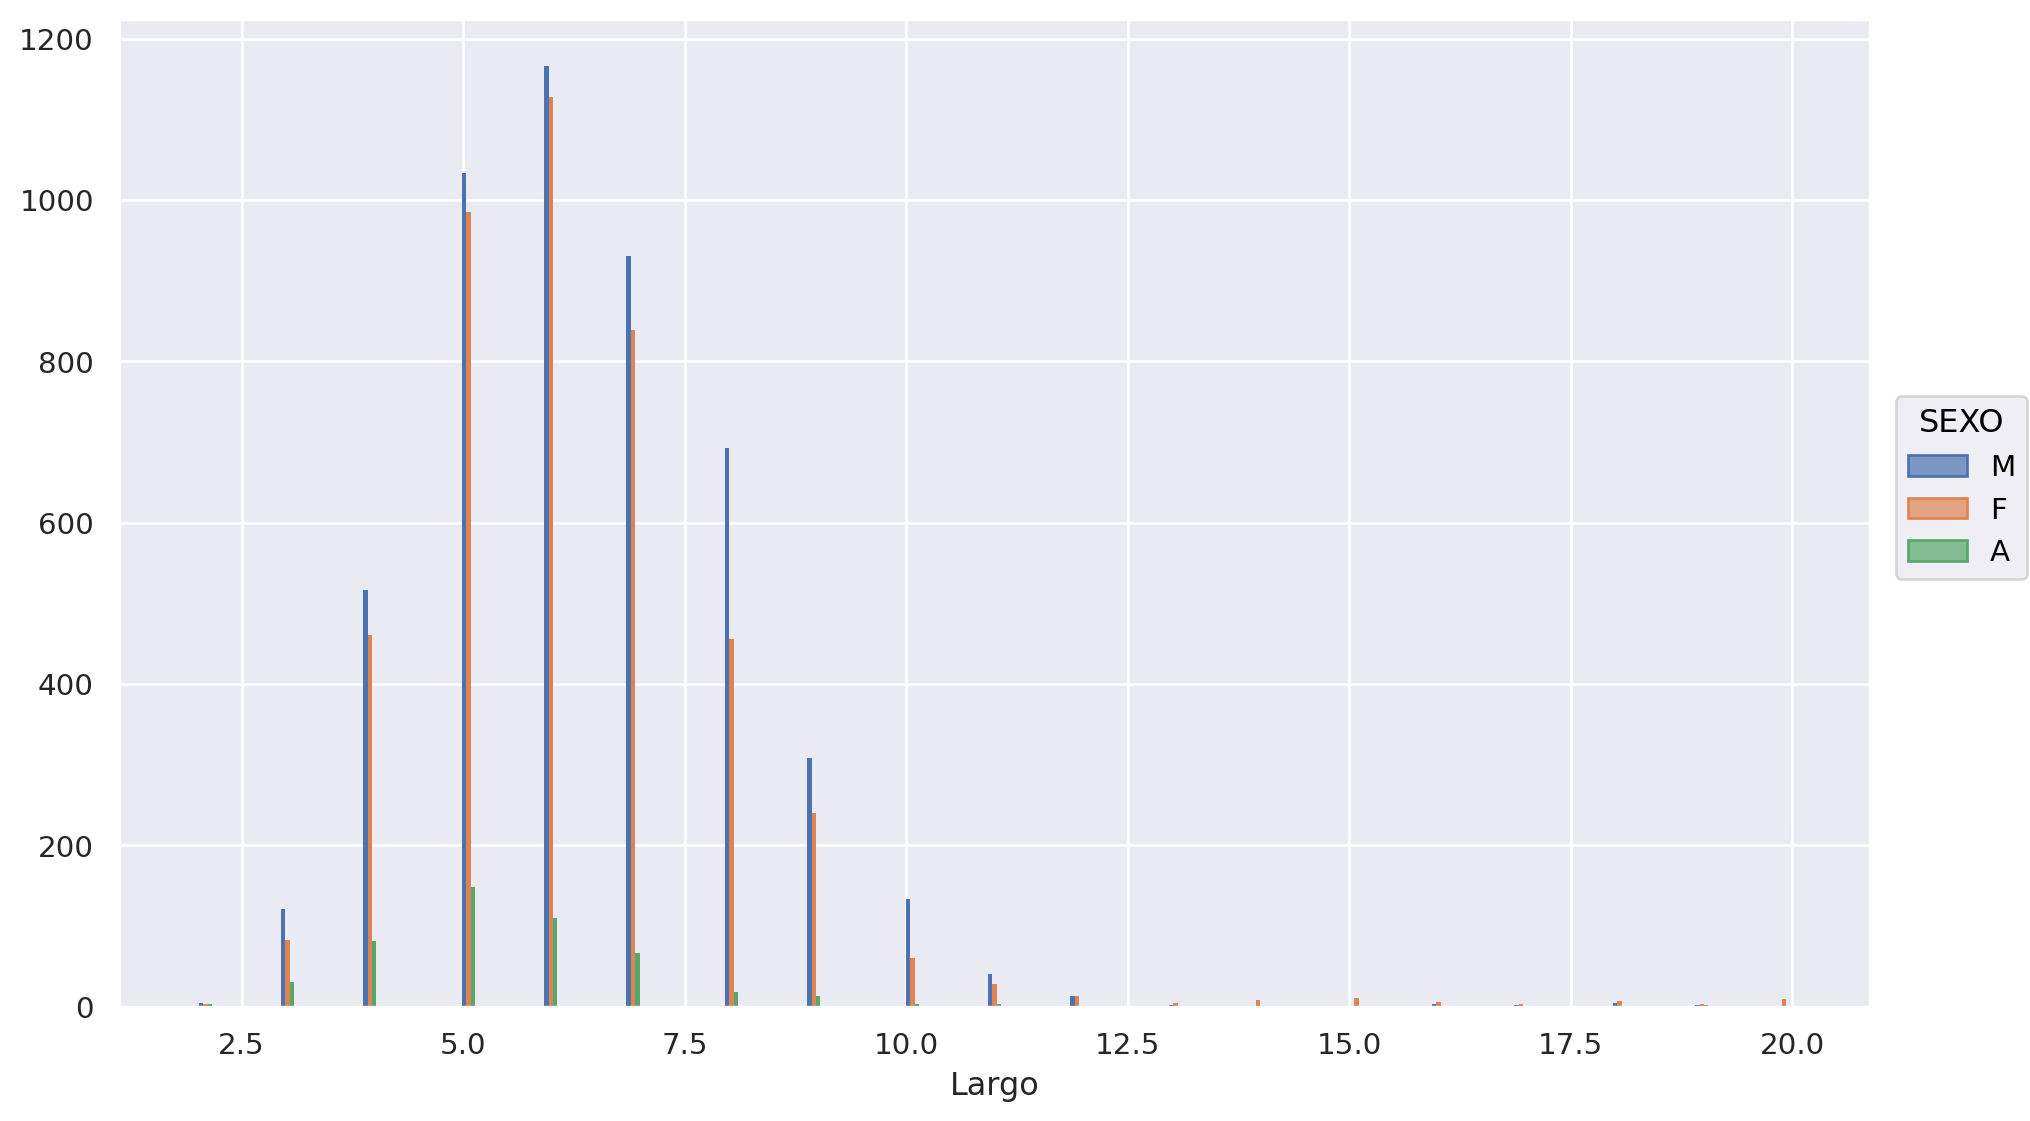

In [ ]:
so.Plot(data=df, x='Largo', color='SEXO').add(so.Bar(), so.Hist(), so.Dodge()).layout(size=(10,6))  # <<--- cambia el tamaño general

### 7. **BONUS**: elimina los nombres compuestos y repeti el punto 4.

In [ ]:
# Eliminar nombres compuestos: asumimos que los nombres compuestos tienen espacios.
df = df[~df['NOMBRE'].str.contains(' ')]

In [ ]:
# nombres mas cortos por sexo
min_largos = df.groupby('SEXO')['Largo'].min()
nombres_mas_cortos = df[df.apply(lambda row: row['Largo'] == min_largos[row['SEXO']], axis=1)]
print("Los nombres más cortos por sexo son:\n", nombres_mas_cortos[['NOMBRE', 'SEXO']])

Los nombres más cortos por sexo son:
      NOMBRE SEXO
322      AL    M
674      AN    F
1661     BO    A
3508     FE    F
4365     HO    M
4438     IA    F
4497     IK    A
5564     LI    A
7097     OG    M
7247     OZ    A
9152     TY    M
9575     YA    F
9675     YU    M


In [ ]:
# nombres mas largos por sexo
max_largos = df.groupby('SEXO')['Largo'].max()
nombres_mas_largos = df[df.apply(lambda row: row['Largo'] == max_largos[row['SEXO']], axis=1)]
print("Los nombres más largos por sexo son:\n", nombres_mas_largos[['NOMBRE', 'SEXO']])

Los nombres más largos por sexo son:
                NOMBRE SEXO
1808     BURGUNDOFARA    F
2095  CESARAUGUSTANUS    M
2278     CLITEMNESTRA    F
2396     CRESCENCIANA    F
3669     FRANCAMARINA    F
4292     HERMENEGILDA    F
7438     PERSEVERANDA    F
7650     PURIFICACION    F
8274     SCHEHEREZADA    F
9138      TUJUAYLITES    A


## Problema 2: tratando de reproducir a Chequeado

> La Universidad Pública Nacional hoy no le sirve a nadie más que a los hijos de los ricos y a los de la clase media alta
>
> – Javier Milei, en la presentación del Palacio Libertad.

Para evaluar esta afirmación,
en una nota de [Chequeado](https://chequeado.com/ultimas-noticias/javier-milei-en-la-presentacion-del-palacio-libertad-la-universidad-publica-nacional-hoy-no-le-sirve-a-nadie-mas-que-a-los-hijos-de-los-ricos-y-a-los-de-la-clase-media-alta/)
analizan la proporción de estudiantes que van a la universidad pública según el nivel de ingresos.
Para ello,
utilizan el dataset de la [Encuesta Permanente de Hogares](https://www.indec.gob.ar/indec/web/Institucional-Indec-BasesDeDatos).
Pueden descargarlo pre-filtrado y en formato Parquet (que es compatible con Pandas) desde acá:
`http://users.df.uba.ar/maurosilber/eph_individual_T124.parquet`

En este ejercicio,
vamos a tratar de reproducir el gráfico de dicha nota.
Puede haber diferencias.

*Nota: decil 12 es la categoría que le asignaron a los que no contestaban sobre sus ingresos.*

### 1. Bajá los datos de nombres permitidos e importalos a un pandas dataframe.


In [ ]:
leer = pd.read_parquet("http://users.df.uba.ar/maurosilber/eph_individual_T124.parquet")
df = pd.DataFrame(leer)
df

,edad,asistencia,gestion,nivel,decil
0,44,"No asiste, pero asistió",Ns/Nc,Secundario,12
1,22,"No asiste, pero asistió",Ns/Nc,Universitario,12
2,3,"Sí, asiste",público,Jardín/preescolar,12
3,54,"No asiste, pero asistió",Ns/Nc,Secundario,6
4,53,"No asiste, pero asistió",Ns/Nc,Secundario,6
...,...,...,...,...,...
46045,43,"No asiste, pero asistió",Ns/Nc,Secundario,12
46046,21,"Sí, asiste",público,Secundario,12
46047,20,"Sí, asiste",público,Secundario,12
46048,11,"Sí, asiste",público,Secundario,12


### 2. Para cada columna categórica, describir las categorías posibles.


In [ ]:
# veo cuales son categoricas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46050 entries, 0 to 46049
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   edad        46050 non-null  int64   
 1   asistencia  46050 non-null  category
 2   gestion     46050 non-null  category
 3   nivel       46050 non-null  category
 4   decil       46050 non-null  Int8    
dtypes: Int8(1), category(3), int64(1)
memory usage: 585.4 KB


Las columnas asistencia, gestion y nivel son categoricas y las categorias posibles para cada una son:

In [ ]:
print("Asistencia: ", df['asistencia'].unique())
print("Gestion: ", df['gestion'].unique())
print("Nivel: ", df['nivel'].unique())

Asistencia:  ['No asiste, pero asistió', 'Sí, asiste', 'Ns/Nc', 'Nunca asistió']
Categories (4, object): ['No asiste, pero asistió', 'Ns/Nc', 'Nunca asistió', 'Sí, asiste']
Gestion:  ['Ns/Nc', 'público', 'privado']
Categories (3, object): ['Ns/Nc', 'privado', 'público']
Nivel:  ['Secundario', 'Universitario', 'Jardín/preescolar', 'Primario', 'Terciario', 'Ns/Nc', 'Educación especial (discapacitado)', 'EGB', 'Polimodal', 'Posgrado universitario']
Categories (10, object): ['EGB', 'Educación especial (discapacitado)',
                          'Jardín/preescolar', 'Ns/Nc', ..., 'Primario', 'Secundario', 'Terciario',
                          'Universitario']


### 3. Añadir la columna `universidad` con las siguientes categorias:

- `publica`: si es universitario y asíste a una universidad pública,
- `privada`: si es universitario y asíste a una universidad privada,
- `desconocida`: si es universitario pero no contestó si es pública o privada,
- `ninguna`: si no es universitario.

In [ ]:
# Primero creás la columna 'Universidad' con NaN (vacía)
df['Universidad'] = np.nan

# Luego asignás valores según las condiciones
df.loc[(df['nivel'] == 'Universitario') & (df['gestion'] == 'público'), 'Universidad'] = 'publica'
df.loc[(df['nivel'] == 'Universitario') & (df['gestion'] == 'privada'), 'Universidad'] = 'privada'
df.loc[(df['nivel'] == 'Universitario') & (df['gestion'] == 'Ns/Nc'), 'Universidad'] = 'desconocida'
df.loc[df['nivel'] != 'Universitario', 'Universidad'] = 'ninguna'
df



<ipython-input-141-6c6dabc4a139>:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'publica' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[(df['nivel'] == 'Universitario') & (df['gestion'] == 'público'), 'Universidad'] = 'publica'


,edad,asistencia,gestion,nivel,decil,Universidad
0,44,"No asiste, pero asistió",Ns/Nc,Secundario,12,ninguna
1,22,"No asiste, pero asistió",Ns/Nc,Universitario,12,desconocida
2,3,"Sí, asiste",público,Jardín/preescolar,12,ninguna
3,54,"No asiste, pero asistió",Ns/Nc,Secundario,6,ninguna
4,53,"No asiste, pero asistió",Ns/Nc,Secundario,6,ninguna
...,...,...,...,...,...,...
46045,43,"No asiste, pero asistió",Ns/Nc,Secundario,12,ninguna
46046,21,"Sí, asiste",público,Secundario,12,ninguna
46047,20,"Sí, asiste",público,Secundario,12,ninguna
46048,11,"Sí, asiste",público,Secundario,12,ninguna


### 4. Generar un nuevo DataFrame seleccionando el rango de edad de 18 a 25 años (inclusive).


In [ ]:
df = df[(df['edad'] >= 18) & (df['edad'] <= 25)]
df

,edad,asistencia,gestion,nivel,decil,Universidad
1,22,"No asiste, pero asistió",Ns/Nc,Universitario,12,desconocida
6,25,"Sí, asiste",público,Universitario,6,publica
13,24,"No asiste, pero asistió",Ns/Nc,Secundario,12,ninguna
14,19,"No asiste, pero asistió",Ns/Nc,Secundario,12,ninguna
19,23,"Sí, asiste",público,Universitario,2,publica
...,...,...,...,...,...,...
46037,21,"Sí, asiste",público,Universitario,12,publica
46038,19,"Sí, asiste",público,Universitario,12,publica
46046,21,"Sí, asiste",público,Secundario,12,ninguna
46047,20,"Sí, asiste",público,Secundario,12,ninguna


### 5. Hacer un gráfico de barras mostrando cuantas personas hay en cada categoría de `universidad`.


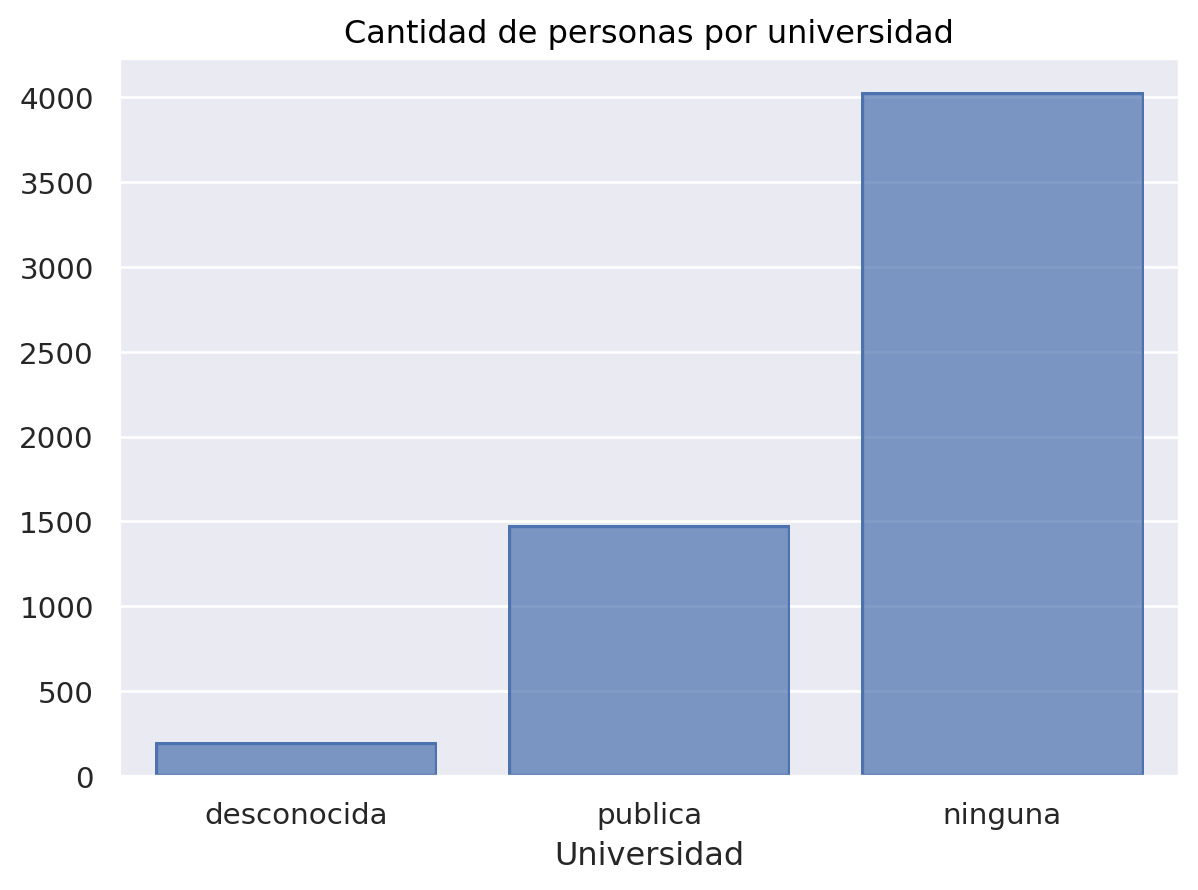

In [ ]:
# toma el df con rango de edad [18,25]
so.Plot(data=df, x='Universidad').add(so.Bar(), so.Count(),so.Dodge()).label(title="Cantidad de personas por universidad")

### 6. Hacer un gráfico de barras apliladas (*e**stack**eadas*) por universidad, en función del decil de ingresos.


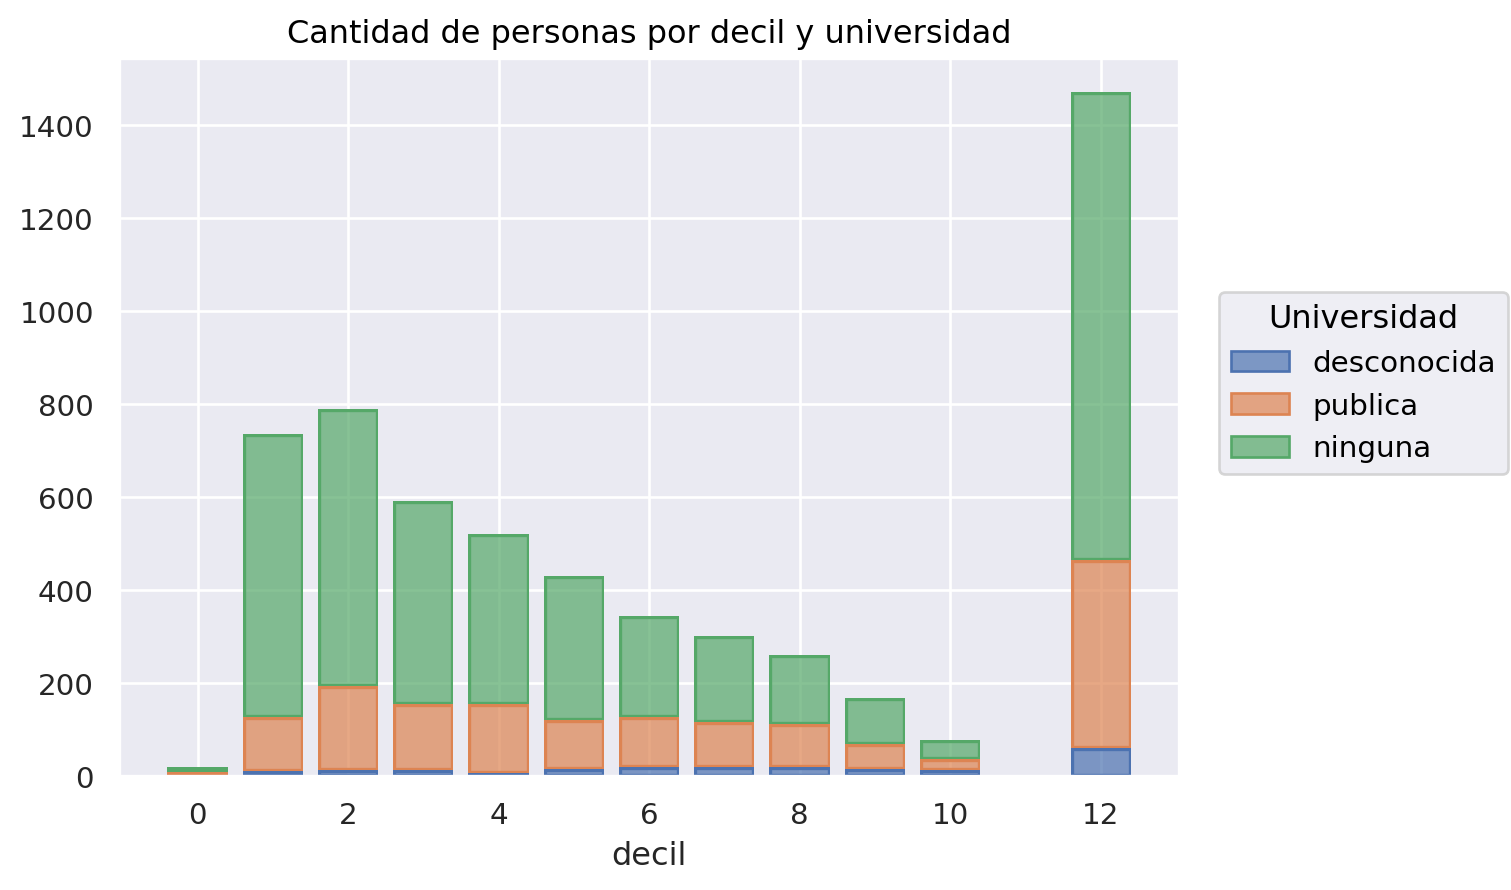

In [ ]:
(
    so.Plot(data=df, x='decil', color='Universidad')
    .add(so.Bar(), so.Count(),so.Stack()) # el so.Stack muestra las superpuestas y no difuminadas como cuando no lo pongo
    .label(title="Cantidad de personas por decil y universidad")
)


### 7. Generar un DataFrame con la cantidad de personas por decil y universidad.


In [ ]:
# .reset_index(name='Cantidad') Convierte el índice de agrupación en columnas normales del DataFrame y llama a la columna nueva 'Cantidad'.
nuevo_df = df.groupby(['decil', 'Universidad']).size().reset_index(name='Cantidad') #agrepa por valor de decil y universidad y cuenta las filas y crea Cantidad
nuevo_df

,decil,Universidad,Cantidad
0,0,ninguna,10
1,0,publica,8
2,1,desconocida,10
3,1,ninguna,609
4,1,publica,117
5,2,desconocida,13
6,2,ninguna,596
7,2,publica,180
8,3,desconocida,12
9,3,ninguna,437


### 8. Añadir una columna `porcentaje_por_decil`, donde se *normaliza* la cantidad de personas (calculada en el punto anterior) al total que hay en ese decil.


In [ ]:
# transform (diferencia a .apply()) sí devuelve algo con el mismo índice que el original ➔ entonces podés asignarlo directo como una nueva columna.
nuevo_df['porcentaje_por_decil'] = nuevo_df.groupby('decil')['Cantidad'].transform(lambda x: (x / x.sum())*100) # por cada decil divide cantidad por la suma de cantidad del mismo decil y multiplica por 100
nuevo_df

,decil,Universidad,Cantidad,porcentaje_por_decil
0,0,ninguna,10,55.555556
1,0,publica,8,44.444444
2,1,desconocida,10,1.358696
3,1,ninguna,609,82.744565
4,1,publica,117,15.896739
5,2,desconocida,13,1.647655
6,2,ninguna,596,75.538657
7,2,publica,180,22.813688
8,3,desconocida,12,2.027027
9,3,ninguna,437,73.817568


### 9. Para cada universidad en un subgráfico distinto, hacer un gráfico de barras de `porcentaje_por_decil` en función del decil. Además, que los subgráficos no compartan (*share*) el eje `porcentaje_por_decil`.

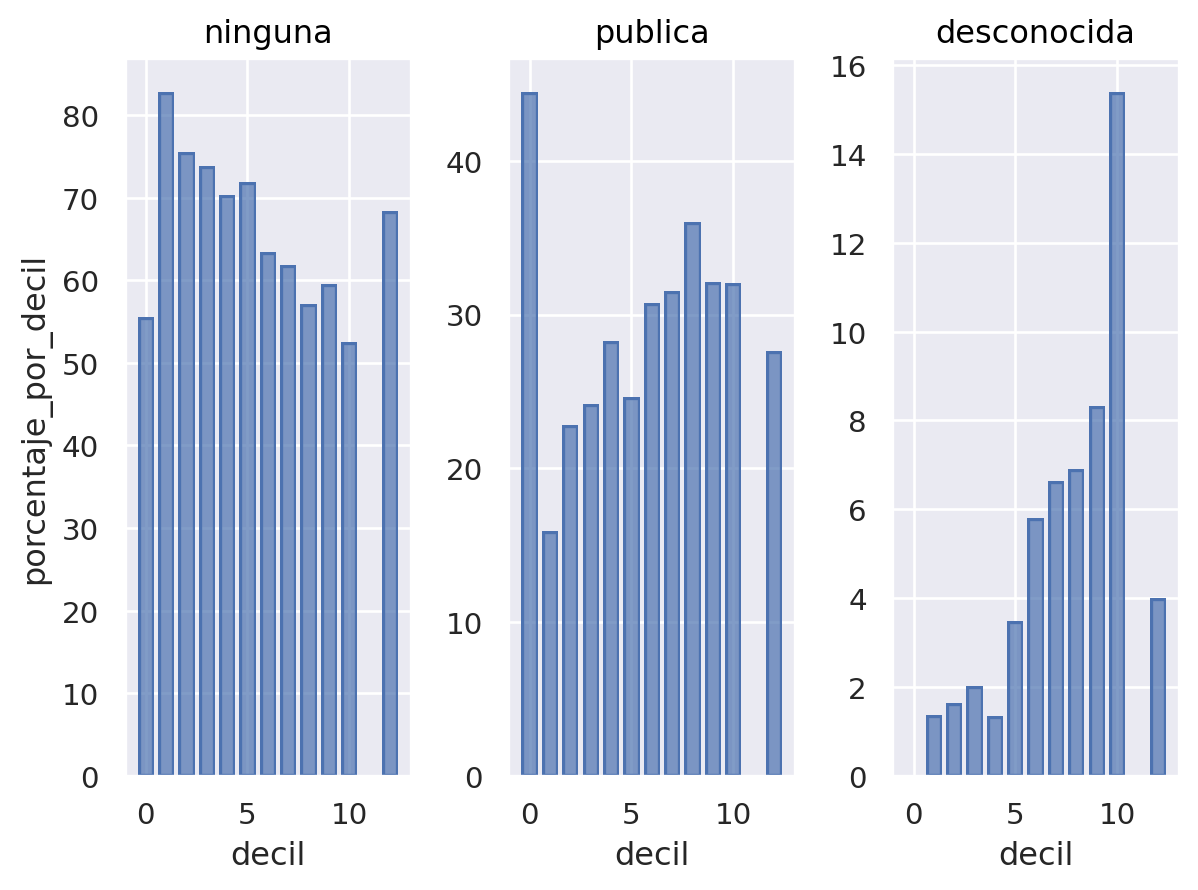

In [ ]:
so.Plot(data=nuevo_df, x='decil', y='porcentaje_por_decil').add(so.Bar()).facet('Universidad').share(y=False)

## Problema 3: espacio verde

El gobierno de la Ciudad de Buenos Aires publica los Límites y ubicación geográfica de los espacios verdes de la Ciudad (jardín, parque, patio recreativo, plaza, plazoleta, cantero y polideportivo).
La persona que hizo ese archivo **ODIA** a la comunidad de datos abiertos en general,
y a los estudiantes de Laboratorio de Datos en particular.
Por eso motivo, hizo especialmente dificil leer la columna de fecha.

https://data.buenosaires.gob.ar/dataset/espacios-verdes

### 1. Bajá los datos de "Espacio Verde Público" e importalos a un pandas dataframe.


In [ ]:
verde = pd.read_csv("espacio_verde_publico.csv", sep=",")
df = pd.DataFrame(verde)
df

,id,nombre,nom_mapa,barrio,comuna,ubicacion,clasificac,tiene_pati,apadrinada,decreto,fecha_decr,ordenanza_,fecha_orde,boletin_of,fecha_bole,area,perimetro,observacio,geometry
0,1442,NaN,NaN,Villa Urquiza,12,NaN,CANTERO CENTRAL,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,162.332974,185.793518,Digitalizado por USIG en Agosto de 2015 - Cant...,POLYGON ((-58.49150207266336 -34.5759953540672...
1,1443,NaN,NaN,Villa Urquiza,12,NaN,CANTERO CENTRAL,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,166.593536,183.701278,Digitalizado por USIG en Agosto de 2015 - Cant...,POLYGON ((-58.490401619722974 -34.575387900733...
2,1444,Jardín Japonés,Jardín Japonés,Palermo,14,"DEL LIBERTADOR, AV. - SARMIENTO, AV. - BERRO, ...",PLAZA,SI,NO,2.833,30/11/1989,43.927,1989-09-11,18.679,1989-12-13,13216.567085,3283.857360,DIFERENTES NOMBRES - Redigitalización en Agost...,MULTIPOLYGON (((-58.40932624744171 -34.5756881...
3,1445,Plaza Sicilia,Pza. Sicilia,Palermo,14,"DEL LIBERTADOR, AV. - SARMIENTO, AV. - BERRO, ...",PLAZA,SI,NO,2.833,30/11/1989,43.927,1989-09-11,18.679,1989-12-13,96633.332061,8260.718105,DIFERENTES NOMBRES - Redigitalización en Agost...,MULTIPOLYGON (((-58.41118016551363 -34.5757493...
4,1446,NaN,NaN,Villa Soldati,8,NaN,CANTERO CENTRAL,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,337.704941,399.457430,Digitalizado por USIG en Septiembre de 2015,POLYGON ((-58.454623092075494 -34.655655651825...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2139,2383,NaN,NaN,Parque Patricios,4,AV BRASIL entre COMBATE DE LOS POZOS y AV PICH...,CANTERO CENTRAL,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.298730,103.297628,Agregado según info provista por DG Reg Urbana...,MULTIPOLYGON (((-58.39528079323495 -34.6302004...
2140,2382,NaN,NaN,Parque Patricios,4,AV BRASIL entre AV JUJUY y CATAMARCA,CANTERO CENTRAL,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.830107,22.611674,Agregado según info provista por DG Reg Urbana...,POLYGON ((-58.401211606036604 -34.631866893133...
2141,2381,NaN,NaN,Parque Patricios,4,AV BRASIL entre LA RIOJA y GRAL URQUIZA,CANTERO CENTRAL,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.205042,12.544116,Agregado según info provista por DG Reg Urbana...,POLYGON ((-58.40651939384915 -34.6338692033484...
2142,2384,NaN,NaN,Parque Patricios,4,AV CHICLANA entre LA RIOJA y GRAL URQUIZA,CANTERO CENTRAL,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.318767,51.149765,Agregado según info provista por DG Reg Urbana...,"POLYGON ((-58.40707061962485 -34.630982792369,..."


### 2. Leer la columna `fecha_decr` del archivo `.csv` y mostrar las primeras 5 filas.


In [ ]:
df['fecha_decr'].head()

,fecha_decr
0,NaN
1,NaN
2,30/11/1989
3,30/11/1989
4,NaN


### 3. Contar los diferentes formatos de fecha presentes.

Ejemplos de formato: [`DD/MM/YY`, `DD-MM-YYYY`]

In [ ]:
fechas_bien = df['fecha_decr'].astype(str) # convierte a columna de str (por si estaba en datetime) para poder usar .str.count(), .str.len(), etc
cantidad_formato_guion_bien = ((fechas_bien.str.count('-') == 2) & (fechas_bien.str.len() <= 10)).sum()
cantidad_formato_barra_bien = ((fechas_bien.str.count('/') == 2) & (fechas_bien.str.len() <= 10)).sum()

print("Cantidad de fechas bien en formato DD-MM-YYYY:", cantidad_formato_guion_bien)
print("Cantidad de fechas bien en formato DD/MM/YYYY:", cantidad_formato_barra_bien)


Cantidad de fechas bien en formato DD-MM-YYYY: 5
Cantidad de fechas bien en formato DD/MM/YYYY: 547


In [ ]:
fechas_bien = df['fecha_decr'].astype(str)

# Formatos con guiones
guion_yyyy = (fechas_bien.str.count('-') == 2) & (fechas_bien.str.len() == 10)
guion_yy    = (fechas_bien.str.count('-') == 2) & (fechas_bien.str.len() == 8)

# Formatos con barras
barra_yyyy = (fechas_bien.str.count('/') == 2) & (fechas_bien.str.len() == 10)
barra_yy   = (fechas_bien.str.count('/') == 2) & (fechas_bien.str.len() == 8)

# Combinamos todos
fechas_formato_bien = guion_yyyy | guion_yy | barra_yyyy | barra_yy

cantidad_formato_bien = fechas_formato_bien.sum()
print("Cantidad total de fechas con formato bien (guiones o barras, YY o YYYY):", cantidad_formato_bien)



Cantidad total de fechas con formato bien (guiones o barras, YY o YYYY): 551


### 4. Convertir la mayor cantidad de elementos posible de esta columa a tipo `datetime`.

In [ ]:
# errors='coerce' ➔ Si encuentra un valor que no puede convertir (por ejemplo, un dato raro como "no sé", "--" o vacío),
# lo reemplaza por NaT ("Not a Time", es como un NaN pero para fechas)
df['fecha_decr'] = pd.to_datetime(df['fecha_decr'], errors='coerce') # convertir a formato de fecha y hora
df

<ipython-input-152-ec3b479604ef>:3: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['fecha_decr'] = pd.to_datetime(df['fecha_decr'], errors='coerce') # convertir a formato de fecha y hora


,id,nombre,nom_mapa,barrio,comuna,ubicacion,clasificac,tiene_pati,apadrinada,decreto,fecha_decr,ordenanza_,fecha_orde,boletin_of,fecha_bole,area,perimetro,observacio,geometry
0,1442,NaN,NaN,Villa Urquiza,12,NaN,CANTERO CENTRAL,NO,NaN,NaN,NaT,NaN,NaN,NaN,NaN,162.332974,185.793518,Digitalizado por USIG en Agosto de 2015 - Cant...,POLYGON ((-58.49150207266336 -34.5759953540672...
1,1443,NaN,NaN,Villa Urquiza,12,NaN,CANTERO CENTRAL,NO,NaN,NaN,NaT,NaN,NaN,NaN,NaN,166.593536,183.701278,Digitalizado por USIG en Agosto de 2015 - Cant...,POLYGON ((-58.490401619722974 -34.575387900733...
2,1444,Jardín Japonés,Jardín Japonés,Palermo,14,"DEL LIBERTADOR, AV. - SARMIENTO, AV. - BERRO, ...",PLAZA,SI,NO,2.833,1989-11-30,43.927,1989-09-11,18.679,1989-12-13,13216.567085,3283.857360,DIFERENTES NOMBRES - Redigitalización en Agost...,MULTIPOLYGON (((-58.40932624744171 -34.5756881...
3,1445,Plaza Sicilia,Pza. Sicilia,Palermo,14,"DEL LIBERTADOR, AV. - SARMIENTO, AV. - BERRO, ...",PLAZA,SI,NO,2.833,1989-11-30,43.927,1989-09-11,18.679,1989-12-13,96633.332061,8260.718105,DIFERENTES NOMBRES - Redigitalización en Agost...,MULTIPOLYGON (((-58.41118016551363 -34.5757493...
4,1446,NaN,NaN,Villa Soldati,8,NaN,CANTERO CENTRAL,NO,NaN,NaN,NaT,NaN,NaN,NaN,NaN,337.704941,399.457430,Digitalizado por USIG en Septiembre de 2015,POLYGON ((-58.454623092075494 -34.655655651825...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2139,2383,NaN,NaN,Parque Patricios,4,AV BRASIL entre COMBATE DE LOS POZOS y AV PICH...,CANTERO CENTRAL,NO,NaN,NaN,NaT,NaN,NaN,NaN,NaN,105.298730,103.297628,Agregado según info provista por DG Reg Urbana...,MULTIPOLYGON (((-58.39528079323495 -34.6302004...
2140,2382,NaN,NaN,Parque Patricios,4,AV BRASIL entre AV JUJUY y CATAMARCA,CANTERO CENTRAL,NO,NaN,NaN,NaT,NaN,NaN,NaN,NaN,18.830107,22.611674,Agregado según info provista por DG Reg Urbana...,POLYGON ((-58.401211606036604 -34.631866893133...
2141,2381,NaN,NaN,Parque Patricios,4,AV BRASIL entre LA RIOJA y GRAL URQUIZA,CANTERO CENTRAL,NO,NaN,NaN,NaT,NaN,NaN,NaN,NaN,8.205042,12.544116,Agregado según info provista por DG Reg Urbana...,POLYGON ((-58.40651939384915 -34.6338692033484...
2142,2384,NaN,NaN,Parque Patricios,4,AV CHICLANA entre LA RIOJA y GRAL URQUIZA,CANTERO CENTRAL,NO,NaN,NaN,NaT,NaN,NaN,NaN,NaN,49.318767,51.149765,Agregado según info provista por DG Reg Urbana...,"POLYGON ((-58.40707061962485 -34.630982792369,..."
